In [19]:
#DATA OBTAINED FROM 
#https://catalog.data.gov/dataset/consumer-complaint-database
#INSPIRED FROM 
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [20]:
#PROBLEM FORMULATION
#The problem is supervised text classification problem, and our goal is to investigate which supervised machine learning 
#methods are best suited to solve it.
#Given a new complaint comes in, we want to assign it to one of 12 categories.

In [21]:
#PART 01 :
#DATA EXPLORATION 
import pandas as pd
df = pd.read_csv('DATA/Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [22]:
#PART 02 
#INPUT OUTPUT SEGREGATION 
#For this project, we need only two columns — “Product” and “Consumer complaint narrative”.
#Input: Consumer_complaint_narrative
#Output:Product

In [23]:
#PART 03 
#DATA CLEANING 

In [24]:
#remove all column except input and output 
col = ['Product', 'Consumer complaint narrative']
df = df[col]
#remove null consumer complaint 
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
#factorize the product and rename with categoryid 
df['category_id'] = df['Product'].factorize()[0]
#remove duplicates 
df=df.drop_duplicates()


In [25]:
df.head()

,Product,Consumer_complaint_narrative,category_id
0,Debt collection,transworld systems inc. \nis trying to collect...,0
2,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...,1
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
6,Debt collection,This complain it against Fifth Third Bank. ( f...,0
10,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh...",2


In [26]:
#preserve mapping of product to category id mapping 
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

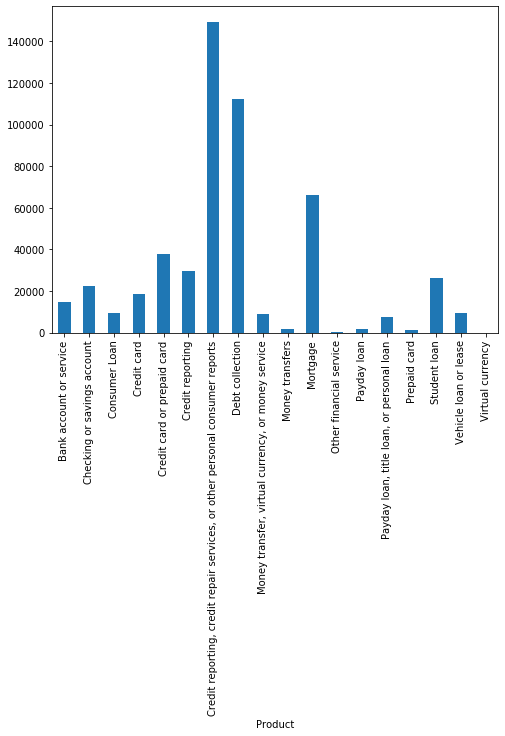

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [28]:
#remove product id 
df =df.drop(df.loc[:,['Product']], axis =1 )
df.head()

,Consumer_complaint_narrative,category_id
0,transworld systems inc. \nis trying to collect...,0
2,I would like to request the suppression of the...,1
3,"Over the past 2 weeks, I have been receiving e...",0
6,This complain it against Fifth Third Bank. ( f...,0
10,"I was sold access to an event digitally, of wh...",2


In [29]:
#see number of different category id available 
df['category_id'].value_counts()
#we have 17 categories 

1     149352
0     112201
3      66043
5      37903
12     29827
4      26296
7      22301
8      18757
15     14856
10      9442
6       9361
2       9104
9       7375
11      1740
16      1496
13      1448
14       291
17        14
Name: category_id, dtype: int64

In [30]:
df.head()

,Consumer_complaint_narrative,category_id
0,transworld systems inc. \nis trying to collect...,0
2,I would like to request the suppression of the...,1
3,"Over the past 2 weeks, I have been receiving e...",0
6,This complain it against Fifth Third Bank. ( f...,0
10,"I was sold access to an event digitally, of wh...",2


In [31]:
#now our df is ready #now we will go for Text Processig 
#PART -04 
#TEXT PROCESSING 
# One common approach for extracting features from text is to use the bag of words model:
#     a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words
#     is taken into consideration, but the order in which they occur is ignored.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

MemoryError: 

In [ ]:
#Details of TFIDF vectorization 
# We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:
# ->sublinear_df is set to True to use a logarithmic form for frequency.
# ->min_df is the minimum numbers of documents a word must be present in to be kept.
# ->norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# ->ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
# ->stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [ ]:
#getting memory error will run in google colab 

In [ ]:
#multiclass classifier 